In [10]:
from utilities import *
from astropy.io import fits
import math 
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy import visualization
import os
import pdb
from scipy.optimize import curve_fit as cf
from astropy.modeling import powerlaws, fitting
from operator import add,sub,truediv
from matplotlib import gridspec
from astropy.table import QTable, vstack, hstack
import radio_beam
import sys
import regions
from astropy.wcs import WCS
import glob

plt.rcParams['figure.dpi'] = 300
sourceorder=[1,0,3,2]
plotorder=['DS1','DS2','DS4','DS6']
thesisdatahome=f'../tables/thesis_ethanolmethanol_results/'

xethanolxmethanoltablepaths=glob.glob(thesisdatahome+'*/xc2h5oh_vs_xch3oh.fits')
xethanoltrotch3ohtablepaths=glob.glob(thesisdatahome+'*/xc2h5oh_vs_trot-ch3oh.fits')
xethanoltrotc2h5ohtablepaths=glob.glob(thesisdatahome+'*/xc2h5oh_vs_trot-c2h5oh.fits')

ratioxc2h5ohtablepaths=glob.glob(thesisdatahome+'*/ratio_vs_xc2h5oh.fits')
ratioxch3ohtablepaths=glob.glob(thesisdatahome+'*/ratio_vs_xch3oh.fits')
ratiotrotc2h5ohtablepaths=glob.glob(thesisdatahome+'*/ratio_vs_trot-c2h5oh.fits')
ratiotrotch3ohtablepaths=glob.glob(thesisdatahome+'*/ratio_vs_trot-ch3oh.fits')

In [11]:
xethanol_xmethanol=[QTable.read(xethanolxmethanoltablepaths[x]) for x in sourceorder]
xethanol_trotmethanol=[QTable.read(xethanoltrotch3ohtablepaths[x]) for x in sourceorder]
xethanol_trotethanol=[QTable.read(xethanoltrotc2h5ohtablepaths[x]) for x in sourceorder]

ratio_xethanol=[QTable.read(ratioxc2h5ohtablepaths[x]) for x in sourceorder]
ratio_xmethanol=[QTable.read(ratioxch3ohtablepaths[x]) for x in sourceorder]
ratio_trotc2h5oh=[QTable.read(ratiotrotc2h5ohtablepaths[x]) for x in sourceorder]
ratio_trotch3oh=[QTable.read(ratiotrotch3ohtablepaths[x]) for x in sourceorder]

In [12]:
ratio_trotc2h5oh

[<QTable length=10>
     Distance_1     Ethanol_Methanol_Ratio ...     Lower Trot    
      float64              float64         ...      float64      
 ------------------ ---------------------- ... ------------------
                0.0    0.25592280582207094 ... 172.23233151579097
  417.0000000000415    0.26477716195486767 ...   189.206406631934
  589.7270555096394    0.26697212110688384 ... 193.59942358505447
   834.000000000083     0.2743241086816853 ...  203.5447632866611
  932.4403466175052    0.27029961805936553 ... 194.47712989336262
 1179.4541110192788    0.28110283526021773 ... 200.69156341297997
 1251.0000000001246     0.2785828029895886 ... 222.26655272806096
 1318.6697842903454     0.2709122466993898 ...  201.5541899339855
  1503.514881868633    0.27028705417122634 ... 210.55089333318043
 1719.3350458827356    0.27685072361405294 ... 220.94273329408026,
 <QTable length=18>
     Distance_1     Ethanol_Methanol_Ratio ...     Lower Trot    
      float64              float64 

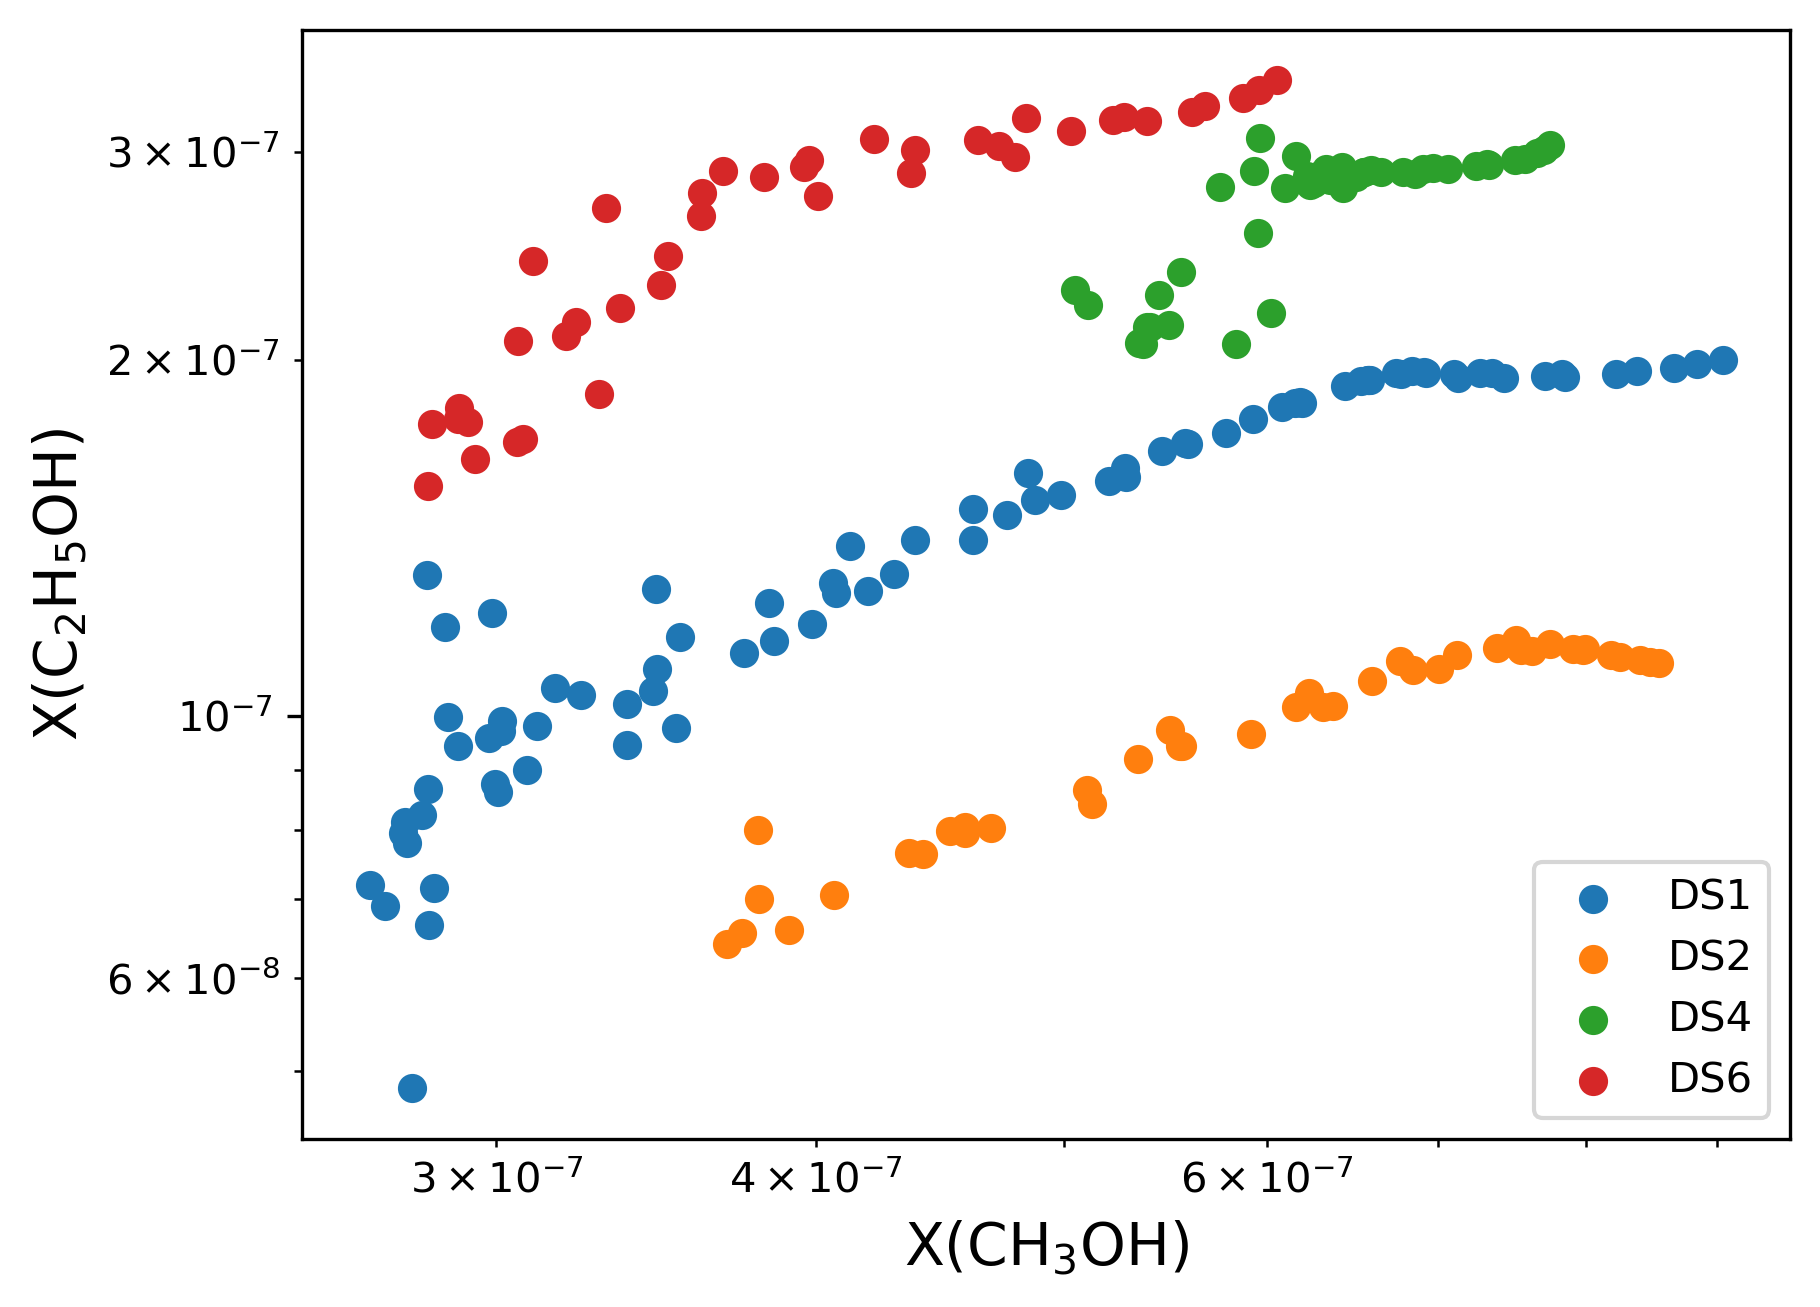

In [29]:
save1path='../plots/XC2H5OHvsXCH3OH/allcore.png'
plt.figure()
for count, source in enumerate(xethanol_xmethanol):
    plt.scatter(source['X(CH3OH)'],source['X(C2H5OH)'],label=plotorder[count])
plt.xlabel(r'X(CH$_3$OH)',fontsize=14)
plt.ylabel('X(C$_2$H$_5$OH)',fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig(save1path)
plt.show()

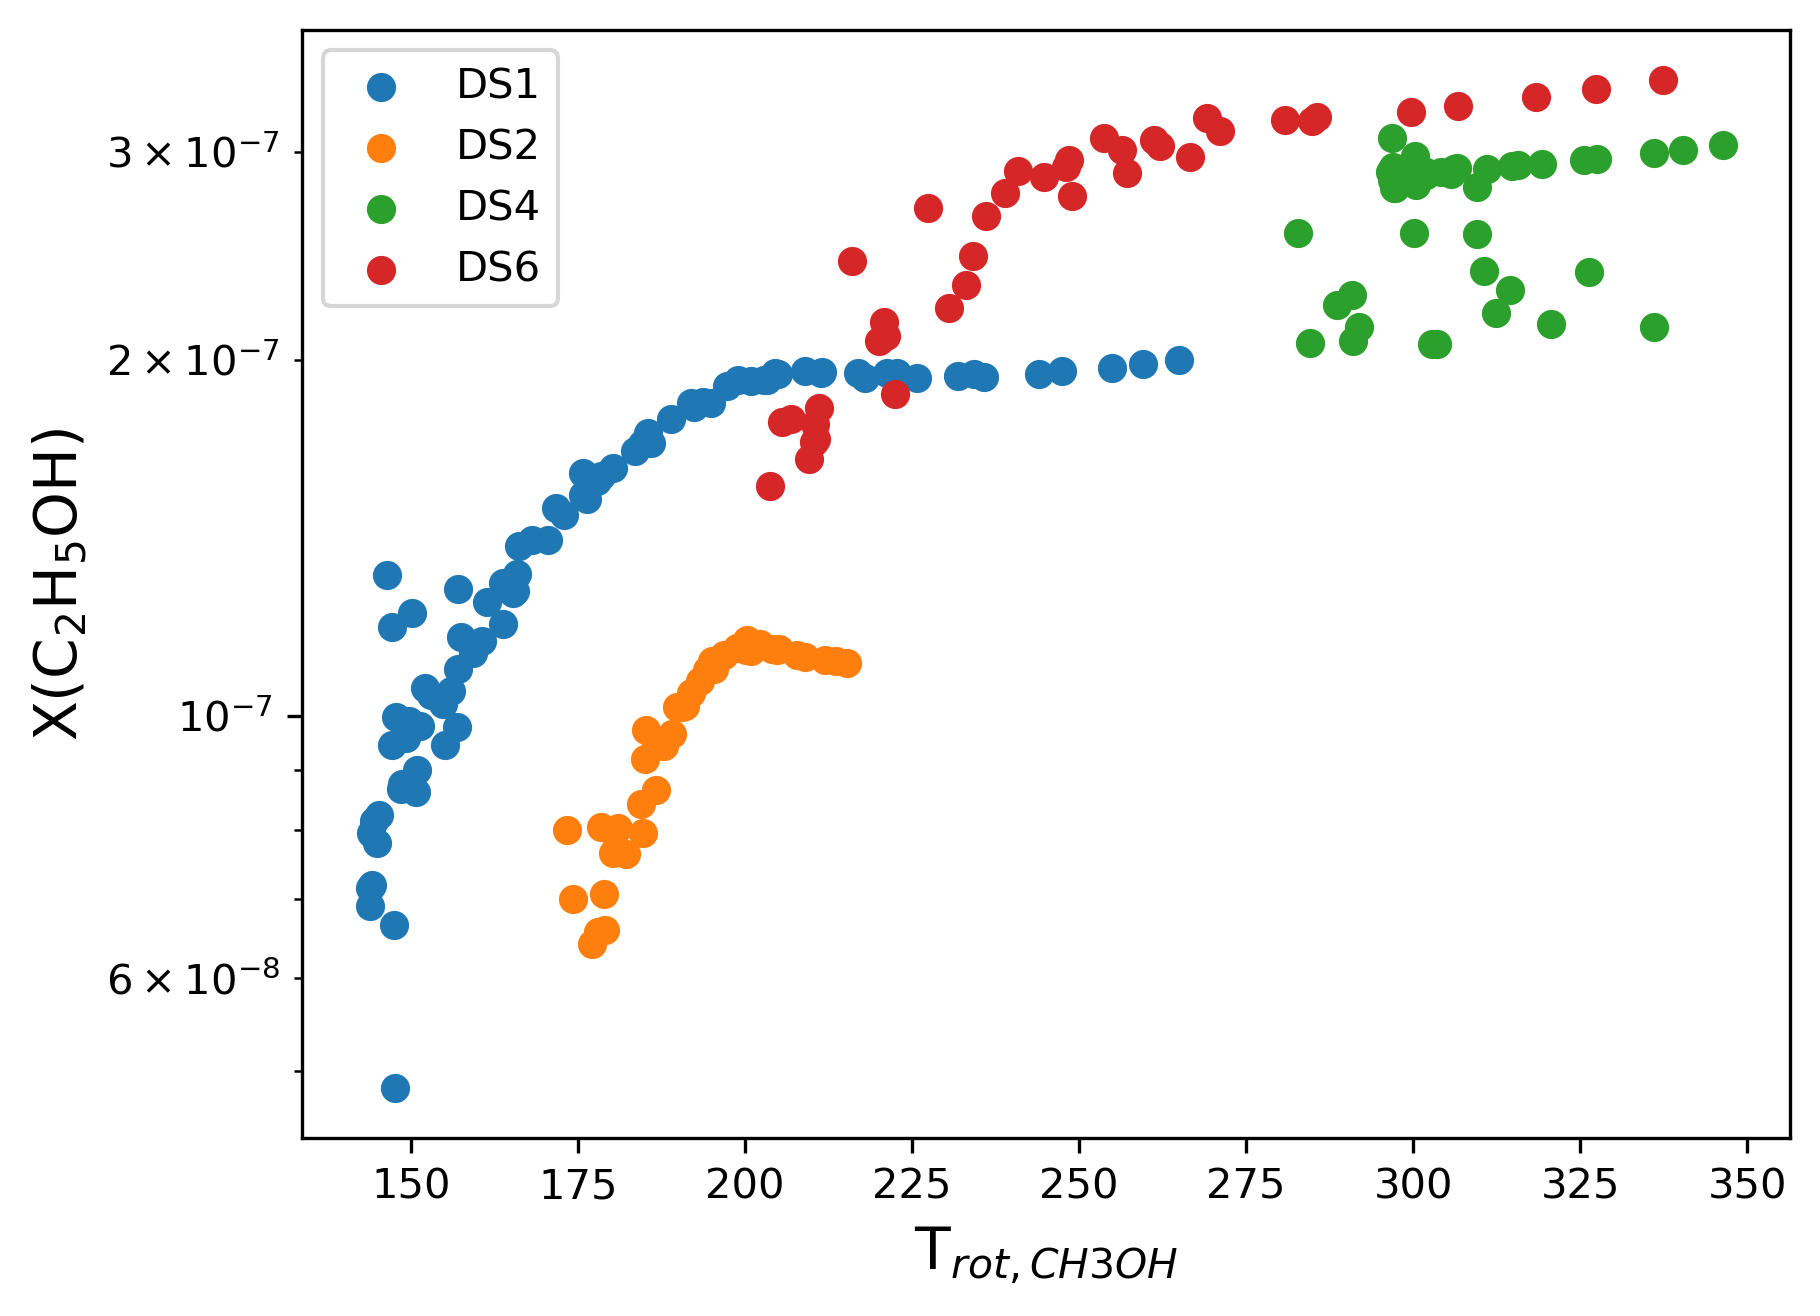

In [30]:
save2path='../plots/XC2H5OHvsTrot_CH3OH/allcore.png'
plt.figure()
for count, source in enumerate(xethanol_trotmethanol):
    plt.scatter(source['Trot'],source['X(C2H5OH)'],label=plotorder[count])
plt.xlabel(r'T$_{rot,CH3OH}$',fontsize=14)
plt.ylabel('X(C$_2$H$_5$OH)',fontsize=14)
plt.yscale('log')
plt.legend()
plt.savefig(save2path)
plt.show()

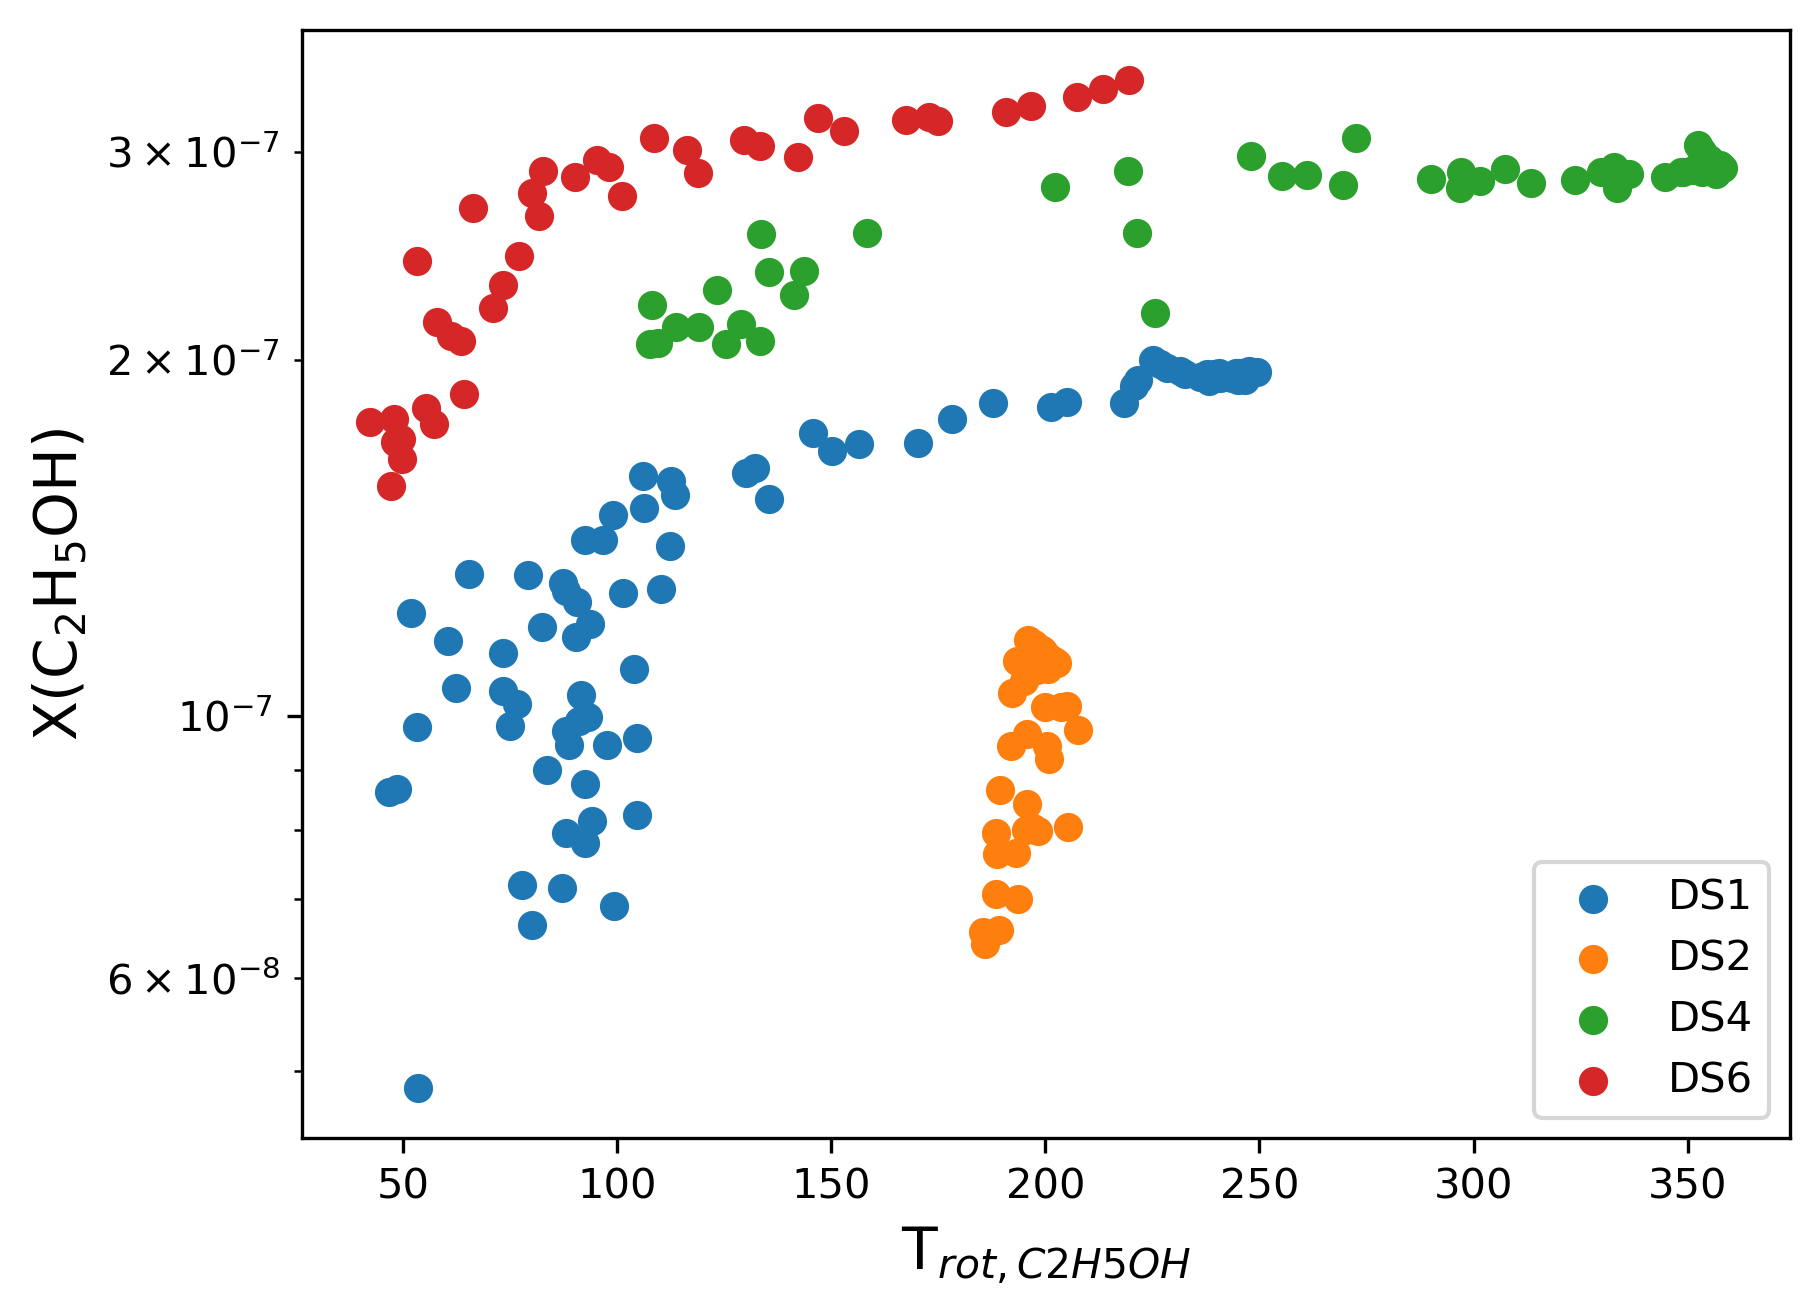

In [31]:
save3path='../plots/XC2H5OHvsTrot_C2H5OH/allcore.png'
plt.figure()
for count, source in enumerate(xethanol_trotethanol):
    plt.scatter(source['Trot'],source['X(C2H5OH)'],label=plotorder[count])
    #plt.errorbar(source['Trot'][0],source['X(C2H5OH)'][0],fmt='o',
                 #yerr=source['Error_X(C2H5OH)'][0])
plt.xlabel(r'T$_{rot,C2H5OH}$',fontsize=14)
plt.ylabel('X(C$_2$H$_5$OH)',fontsize=14)
plt.yscale('log')
plt.legend()
plt.savefig(save3path)
plt.show()

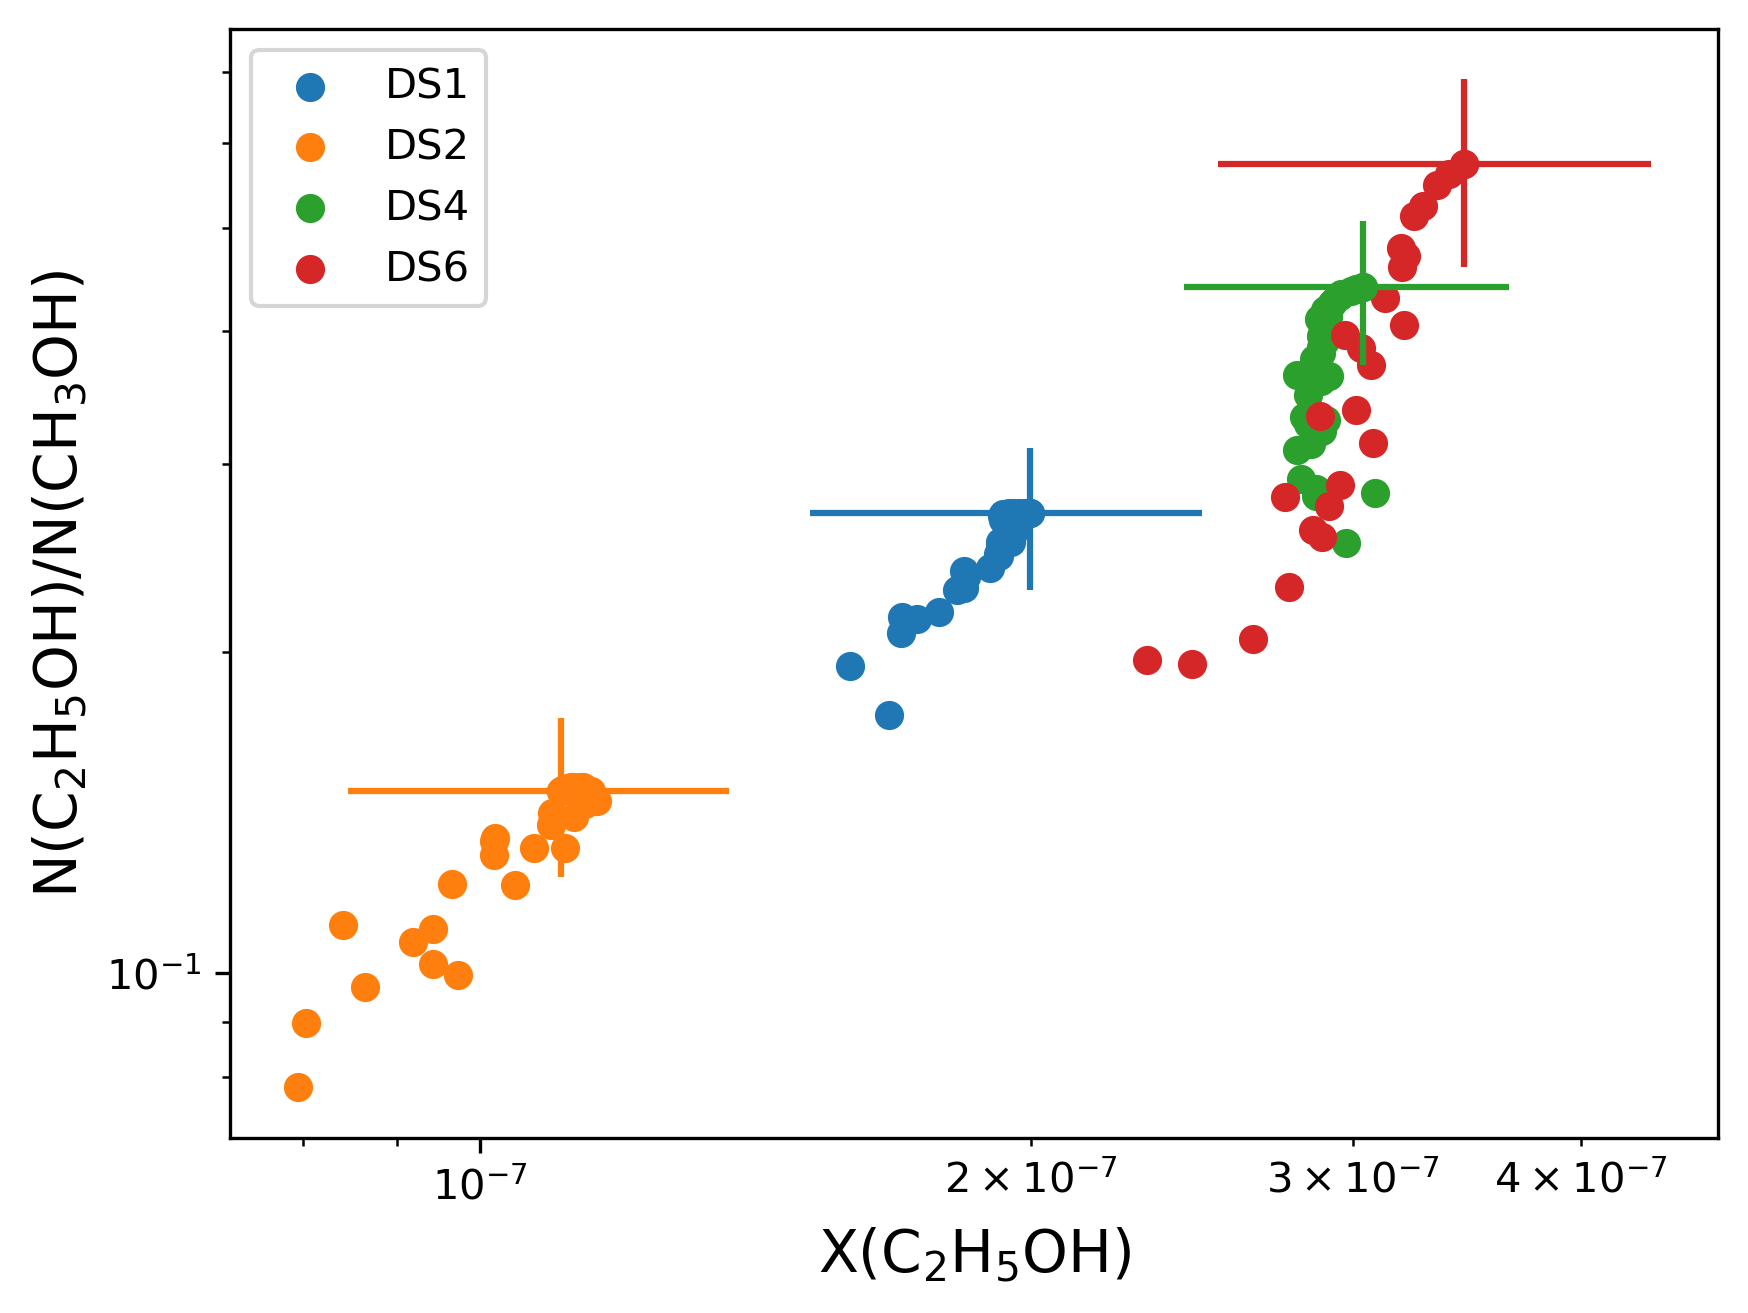

In [33]:
save4path='../plots/AbundanceRatiovsXC2H5OH/allcore.png'
plt.figure()
for count, source in enumerate(ratio_xethanol):
    plt.scatter(source['X(C2H5OH)'][0:],source['Ethanol_Methanol_Ratio'][0:],label=plotorder[count])
    plt.errorbar(source['X(C2H5OH)'][0],source['Ethanol_Methanol_Ratio'][0],fmt='o', xerr=source['Error_X(C2H5OH)'][0],
                 yerr=source['Error_Ethanol_Methanol_Ratio'][0])
plt.xlabel('X(C$_2$H$_5$OH)',fontsize=14)
plt.ylabel(r'N(C$_2$H$_5$OH)/N(CH$_3$OH)',fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig(save4path)
plt.show()

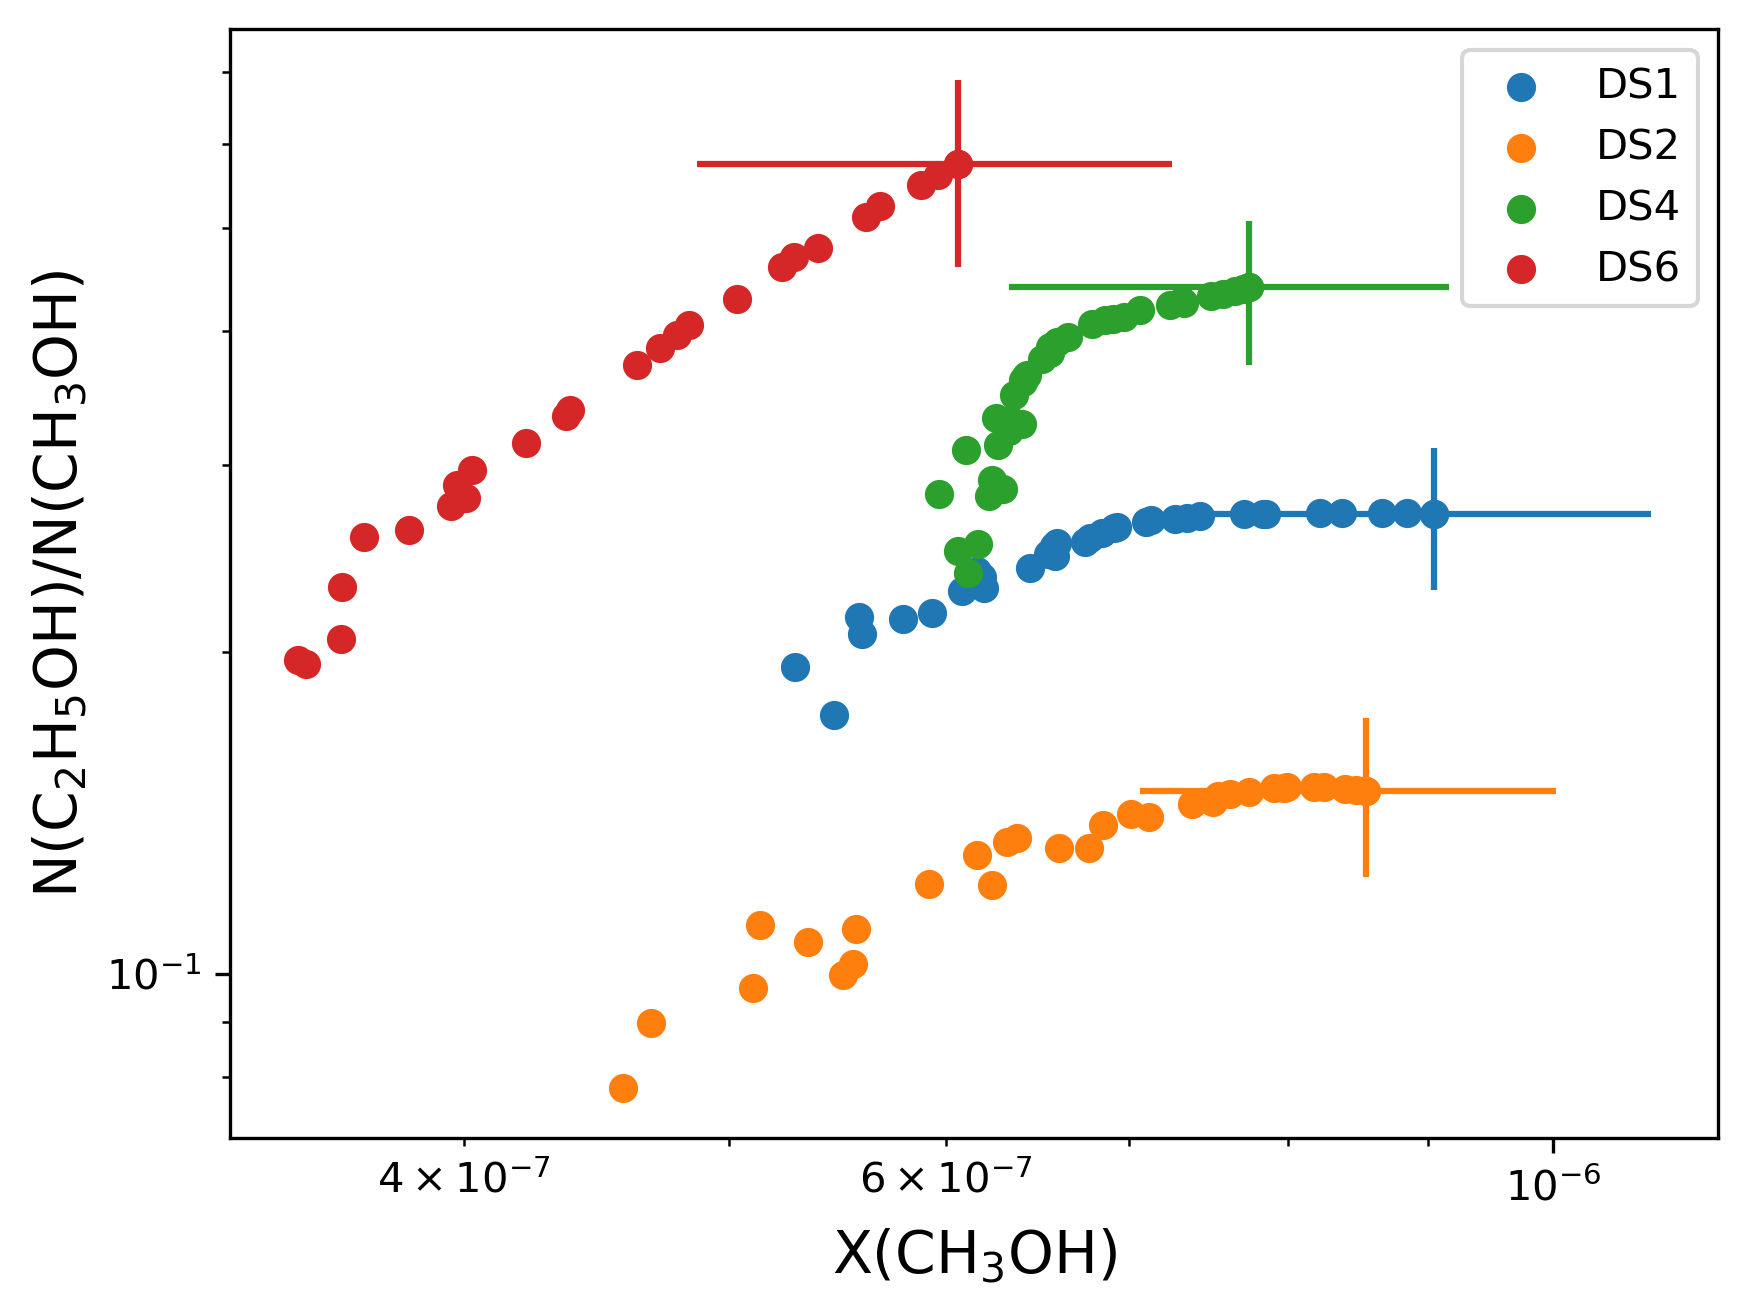

In [34]:
save5path='../plots/AbundanceRatiovsXCH3OH/allcore.png'
plt.figure()
for count, source in enumerate(ratio_xmethanol):
    plt.scatter(source['X(CH3OH)'][0:],source['Ethanol_Methanol_Ratio'][0:],label=plotorder[count])
    plt.errorbar(source['X(CH3OH)'][0],source['Ethanol_Methanol_Ratio'][0],fmt='o',xerr=source['Error_X(CH3OH)'][0],
                 yerr=source['Error_Ethanol_Methanol_Ratio'][0])
plt.xlabel('X(CH$_3$OH)',fontsize=14)
plt.ylabel(r'N(C$_2$H$_5$OH)/N(CH$_3$OH)',fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig(save5path)
plt.show()

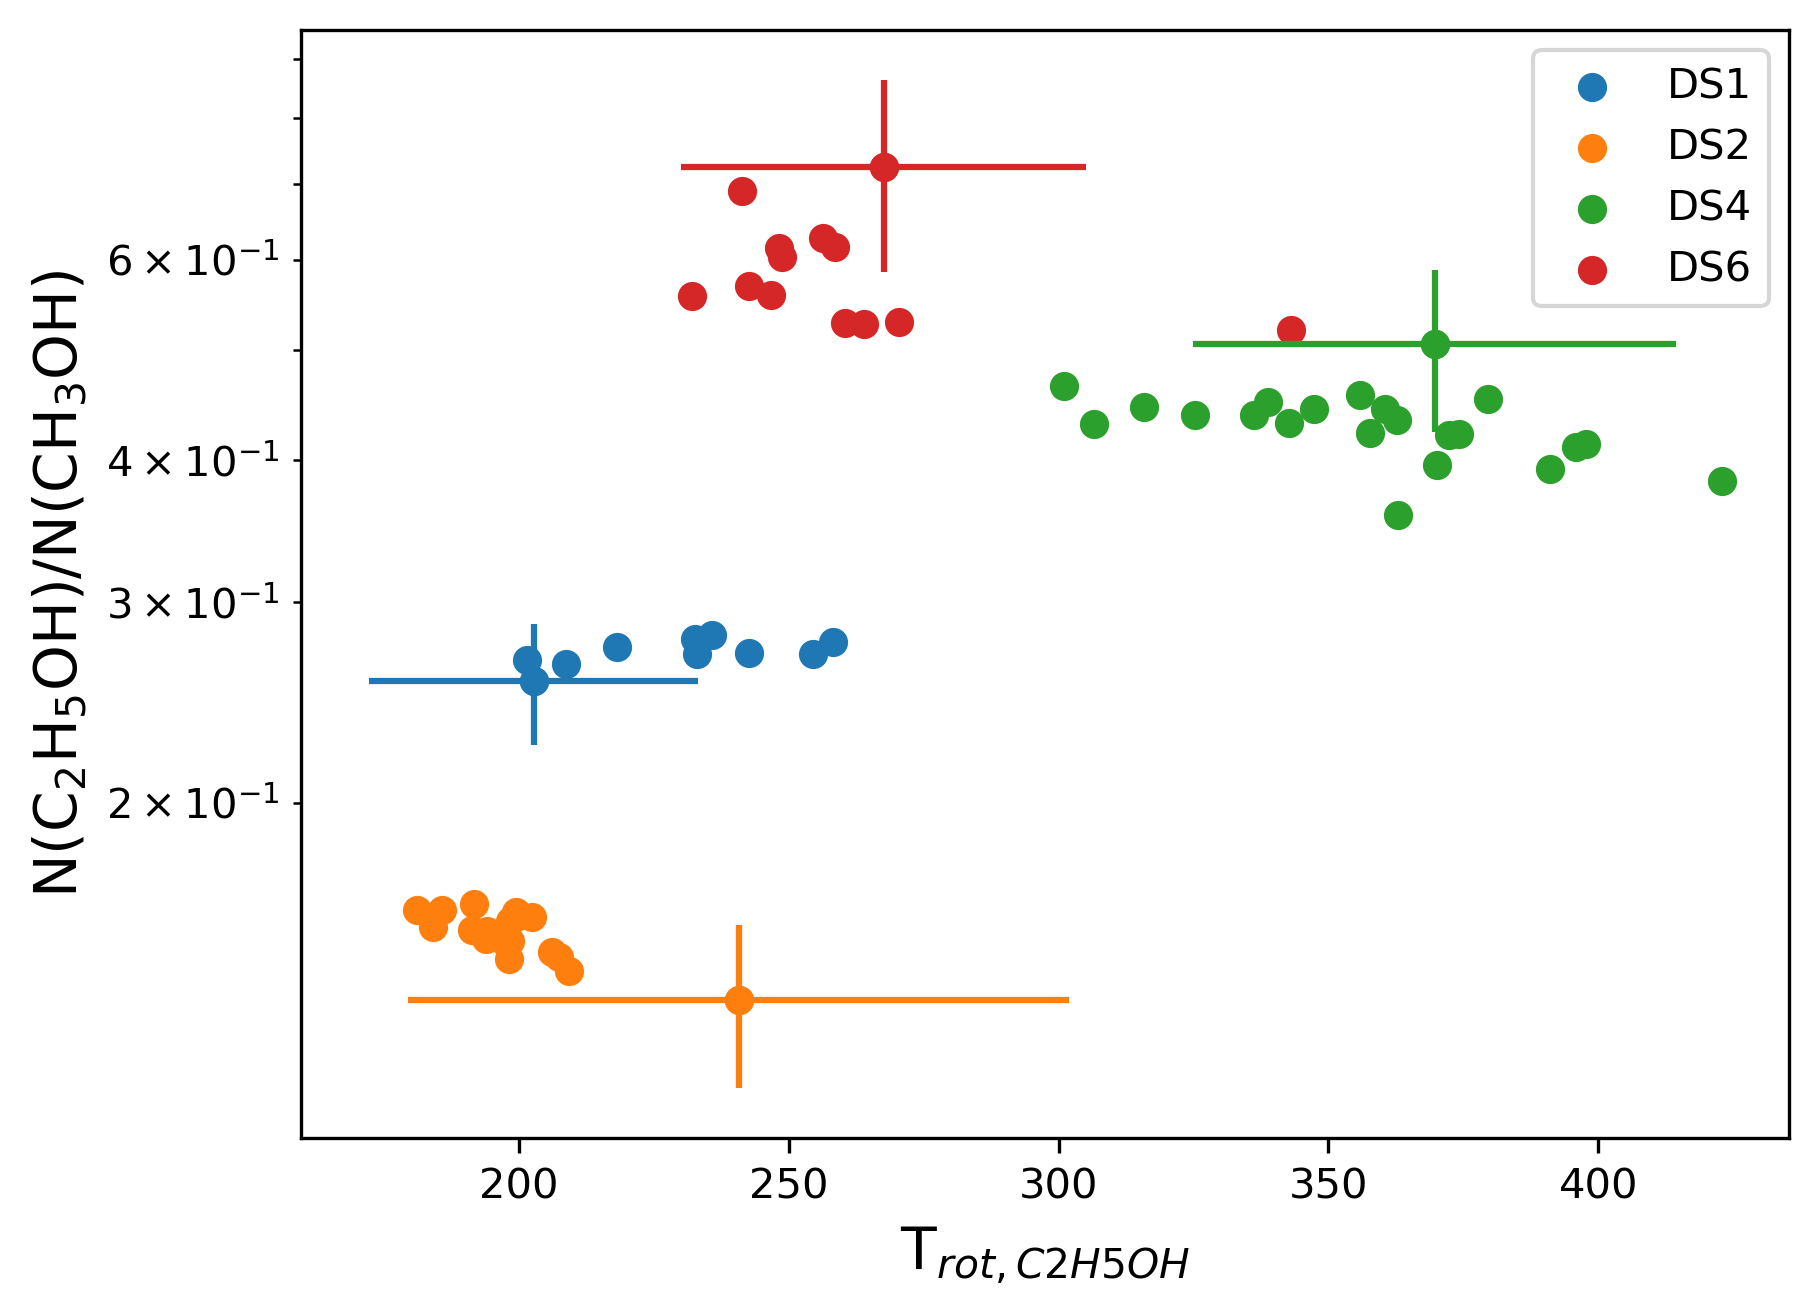

In [35]:
save6path='../plots/AbundanceRatiovsTemperature/allcore.png'
plt.figure()
for count, source in enumerate(ratio_trotc2h5oh):
    plt.scatter(source['Trot'][0:],source['Ethanol_Methanol_Ratio'][0:],label=plotorder[count])
    plt.errorbar(source['Trot'][0],source['Ethanol_Methanol_Ratio'][0],fmt='o',xerr=source['Error_Trot'][0],
                 yerr=source['Error_Ethanol_Methanol_Ratio'][0])
plt.xlabel(r'T$_{rot,C2H5OH}$',fontsize=14)
plt.ylabel(r'N(C$_2$H$_5$OH)/N(CH$_3$OH)',fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig(save6path)
plt.show()

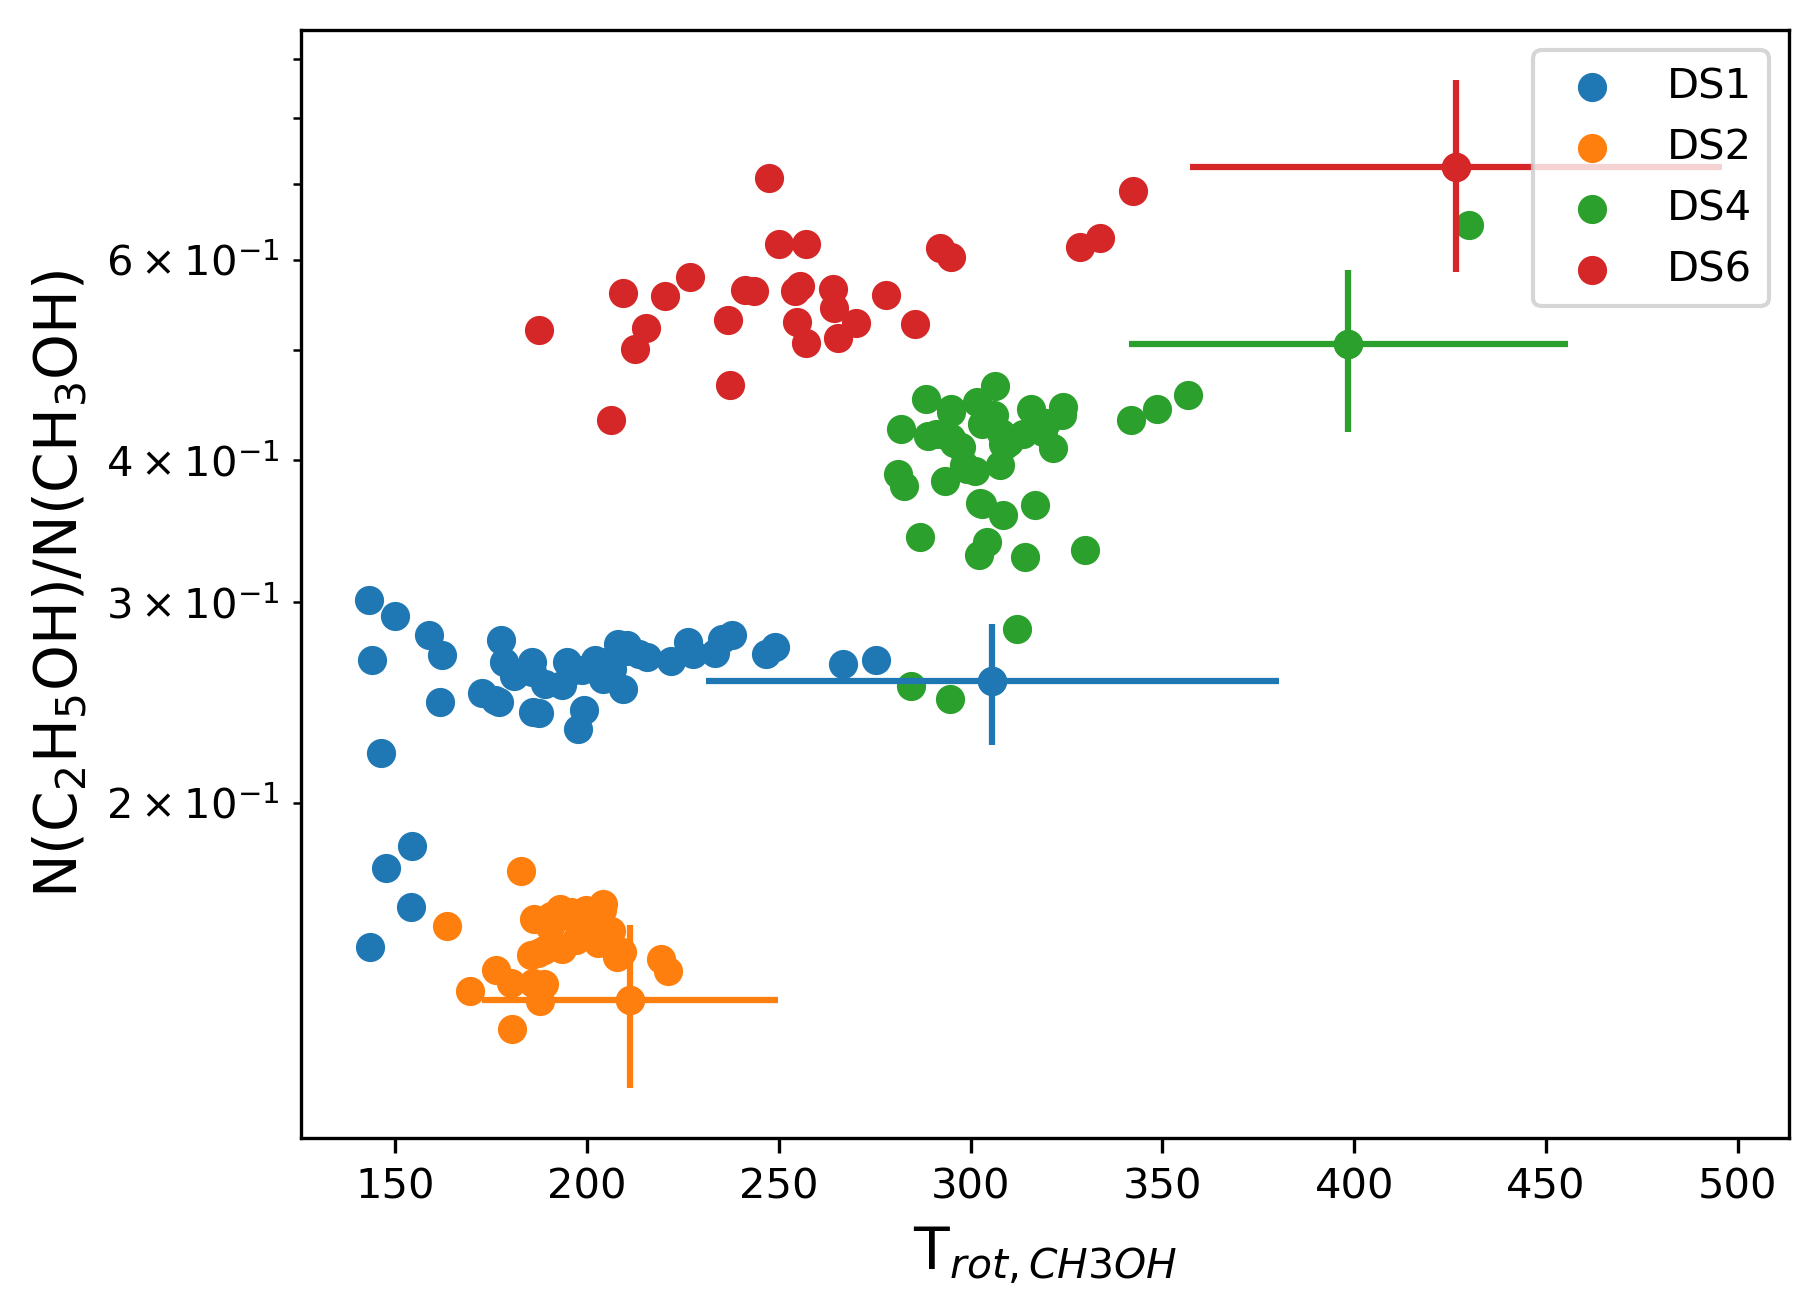

In [23]:
save7path='../plots/AbundanceRatiovsTemperature/ch3oh_allcore.png'
plt.figure()
for count, source in enumerate(ratio_trotch3oh):
    plt.scatter(source['Trot'][0:],source['Ethanol_Methanol_Ratio'][0:],label=plotorder[count])
    plt.errorbar(source['Trot'][0],source['Ethanol_Methanol_Ratio'][0],fmt='o',xerr=source['Error_Trot'][0],
                 yerr=source['Error_Ethanol_Methanol_Ratio'][0])
plt.xlabel(r'T$_{rot,CH3OH}$',fontsize=14)
plt.ylabel(r'N(C$_2$H$_5$OH)/N(CH$_3$OH)',fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.show()

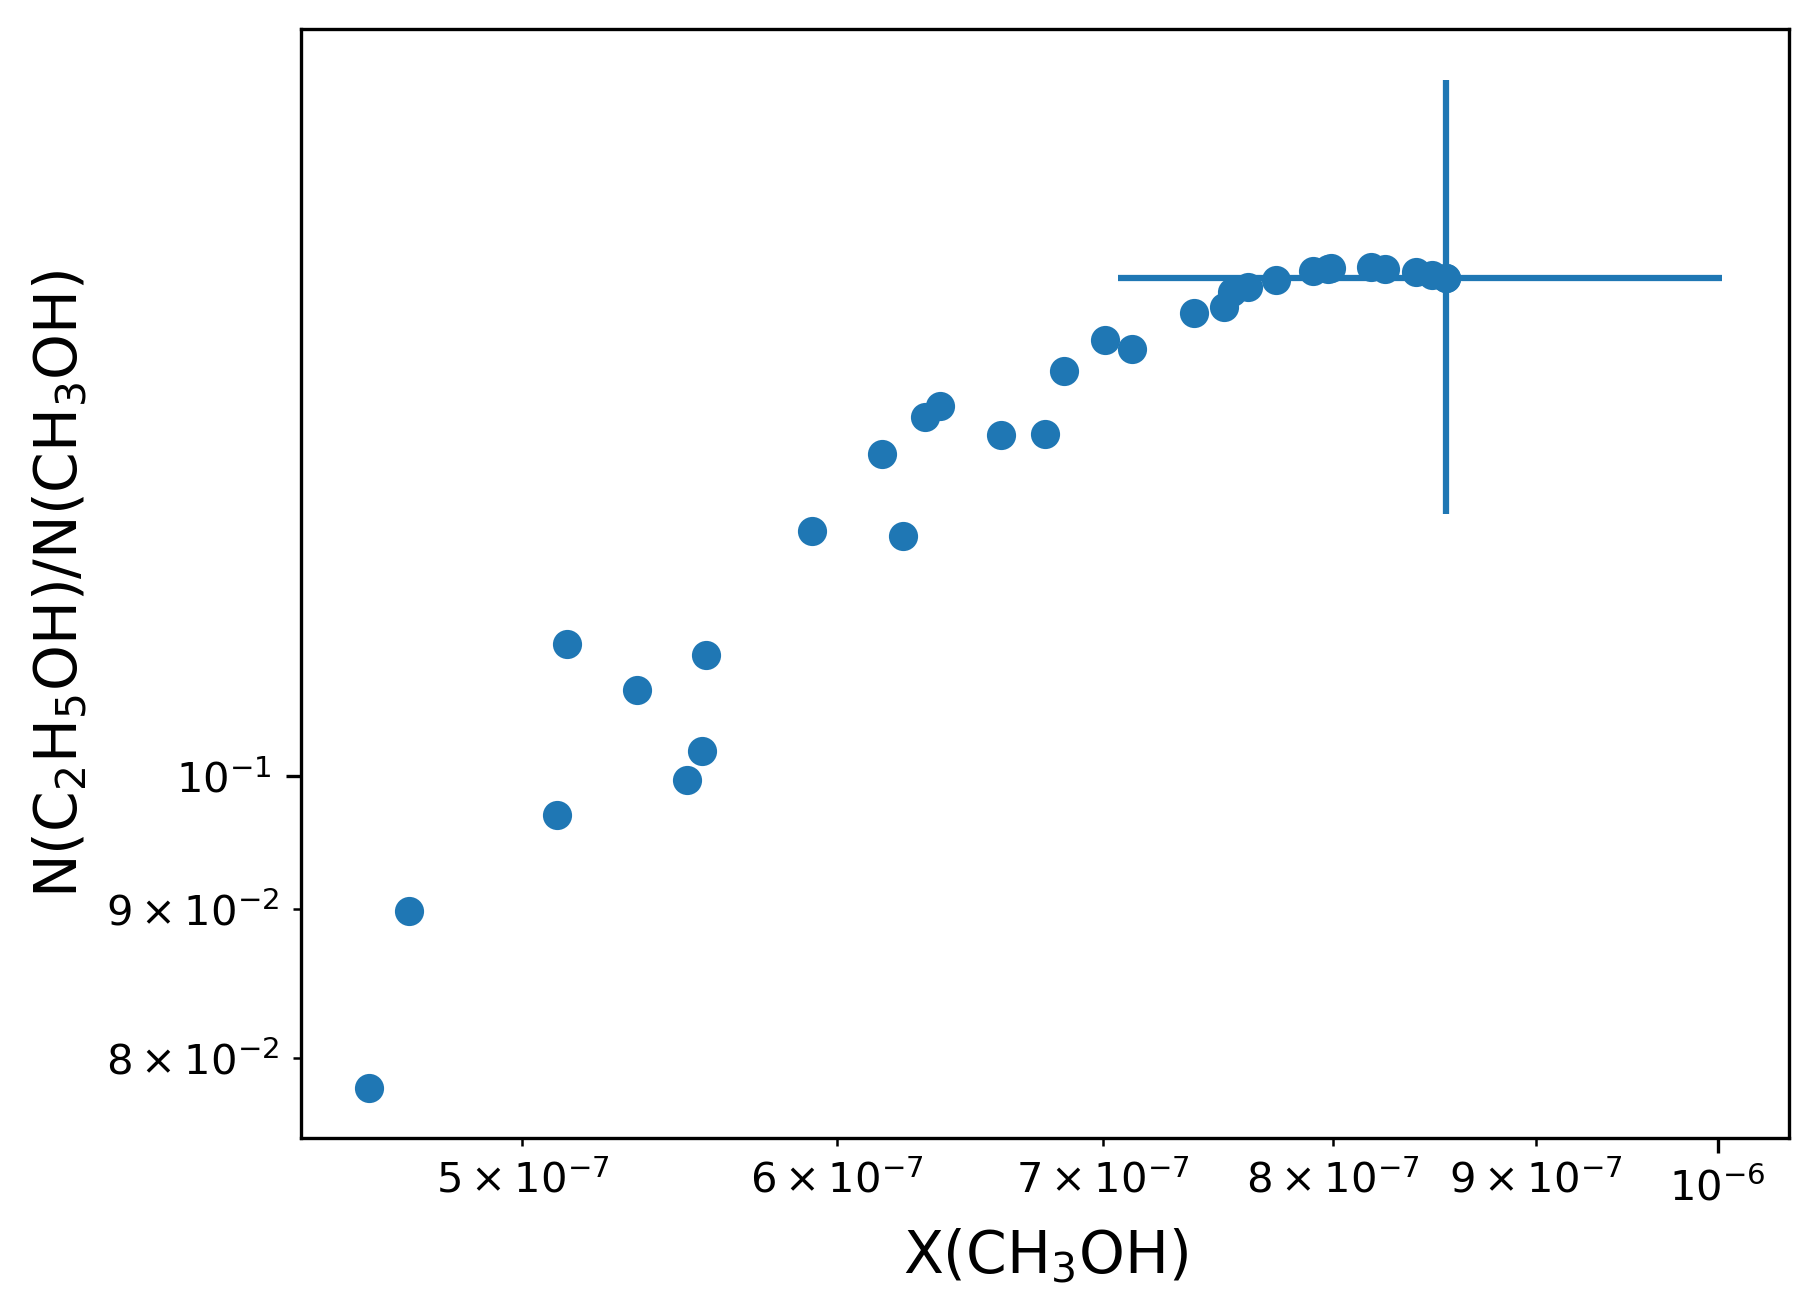

In [114]:
usable_distances=np.intersect1d(np.array(radial_average_ratio['Distance'].data), np.array(radial_average_xch3oh['Distance'].data),
                                               return_indices=True)
usable_ratios=radial_average_ratio[usable_distances[1]]

usable_xch3oh=radial_average_xch3oh[usable_distances[2]]

savetablepath=f'../tables/thesis_ethanolmethanol_results/{source}/ratio_vs_xch3oh.fits'
ratiomethanoltable=hstack([usable_ratios,usable_xch3oh])
ratiomethanoltable.write(savetablepath,overwrite=True)

plt.figure()
plt.scatter(usable_xch3oh['X(CH3OH)'][0:],usable_ratios['Ethanol_Methanol_Ratio'][0:])
plt.errorbar(usable_xch3oh['X(CH3OH)'][0],usable_ratios['Ethanol_Methanol_Ratio'][0],
             xerr=[usable_xch3oh['Error_X(CH3OH)'][0]], yerr=[usable_ratios['Error_Ethanol_Methanol_Ratio'][0]],fmt='o')
plt.ylabel(r'N(C$_2$H$_5$OH)/N(CH$_3$OH)',fontsize=14)
plt.xlabel('X(CH$_3$OH)',fontsize=14)
plt.xscale('log')
plt.yscale('log')
savefigpath=f'../plots/AbundanceRatiovsXCH3OH/{source}/abundanceratio_vs_xch3oh.png'
if not os.path.exists(f'../plots/AbundanceRatiovsXCH3OH/{source}/'):
    os.makedirs(f'../plots/AbundanceRatiovsXCH3OH/{source}/')
plt.savefig(savefigpath)
plt.show()

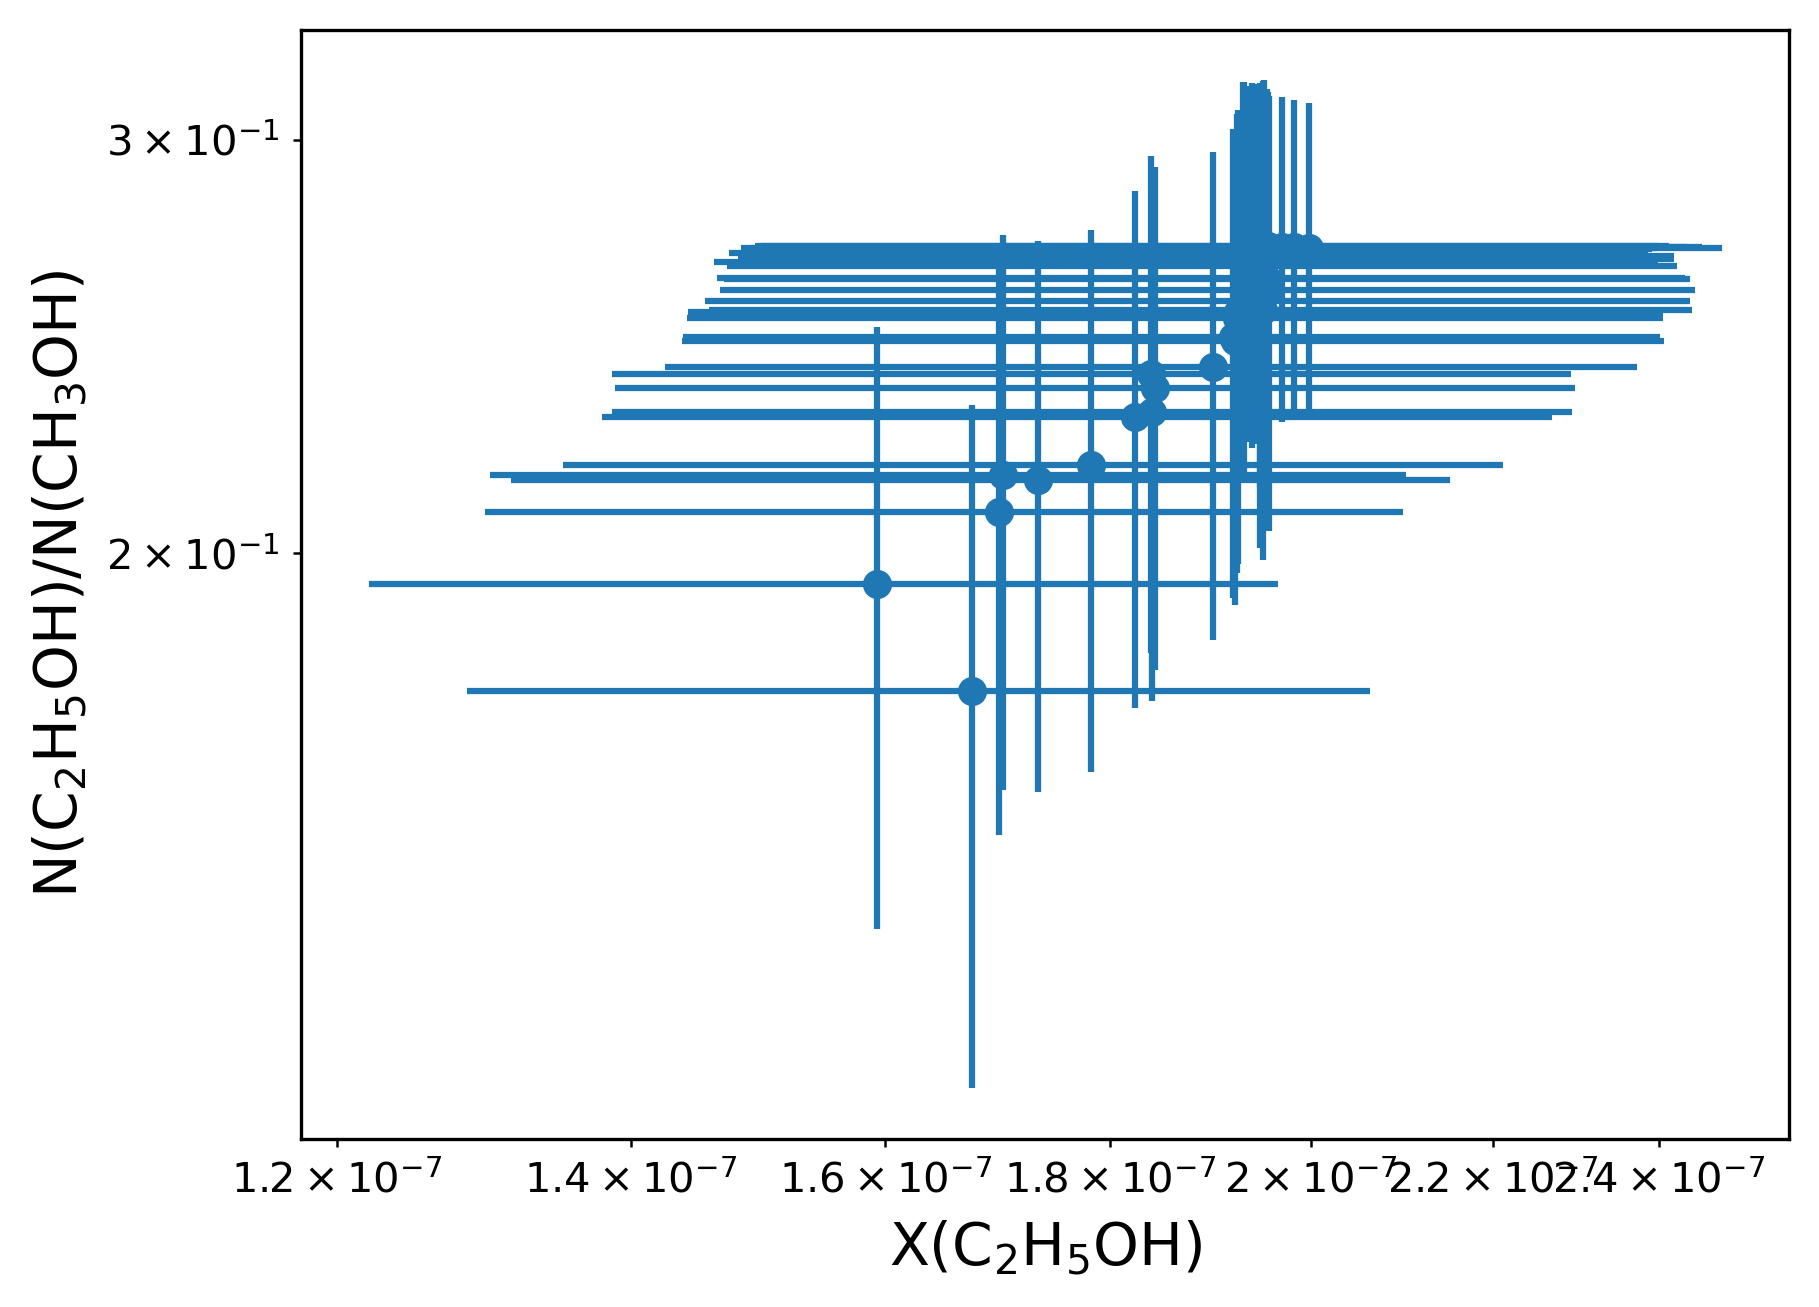

In [99]:
usable_distances=np.intersect1d(np.array(radial_average_ratio['Distance'].data), np.array(radial_average_xc2h5oh['Distance'].data),
                                               return_indices=True)
usable_ratios=radial_average_ratio[usable_distances[1]]

usable_xc2h5oh=radial_average_xc2h5oh[usable_distances[2]]

savetablepath=f'../tables/thesis_ethanolmethanol_results/{source}/ratio_vs_xc2h5oh.fits'
ratioethanoltable=hstack([usable_ratios,usable_xc2h5oh])
ratioethanoltable.write(savetablepath,overwrite=True)

plt.figure()
plt.errorbar(usable_xc2h5oh['X(C2H5OH)'],usable_ratios['Ethanol_Methanol_Ratio'],
             xerr=usable_xc2h5oh['Error_X(C2H5OH)'],yerr=usable_ratios['Error_Ethanol_Methanol_Ratio'],fmt='o')
plt.ylabel(r'N(C$_2$H$_5$OH)/N(CH$_3$OH)',fontsize=14)
plt.xlabel('X(C$_2$H$_5$OH)',fontsize=14)
plt.xscale('log')
plt.yscale('log')
#plt.xlim(xmin=2.75e-7)
savefigpath=f'../plots/AbundanceRatiovsXC2H5OH/{source}/abundanceratio_vs_xc2h5oh.png'
if not os.path.exists(f'../plots/AbundanceRatiovsXC2H5OH/{source}/'):
    os.makedirs(f'../plots/AbundanceRatiovsXC2H5OH/{source}/')
plt.savefig(savefigpath)
plt.show()

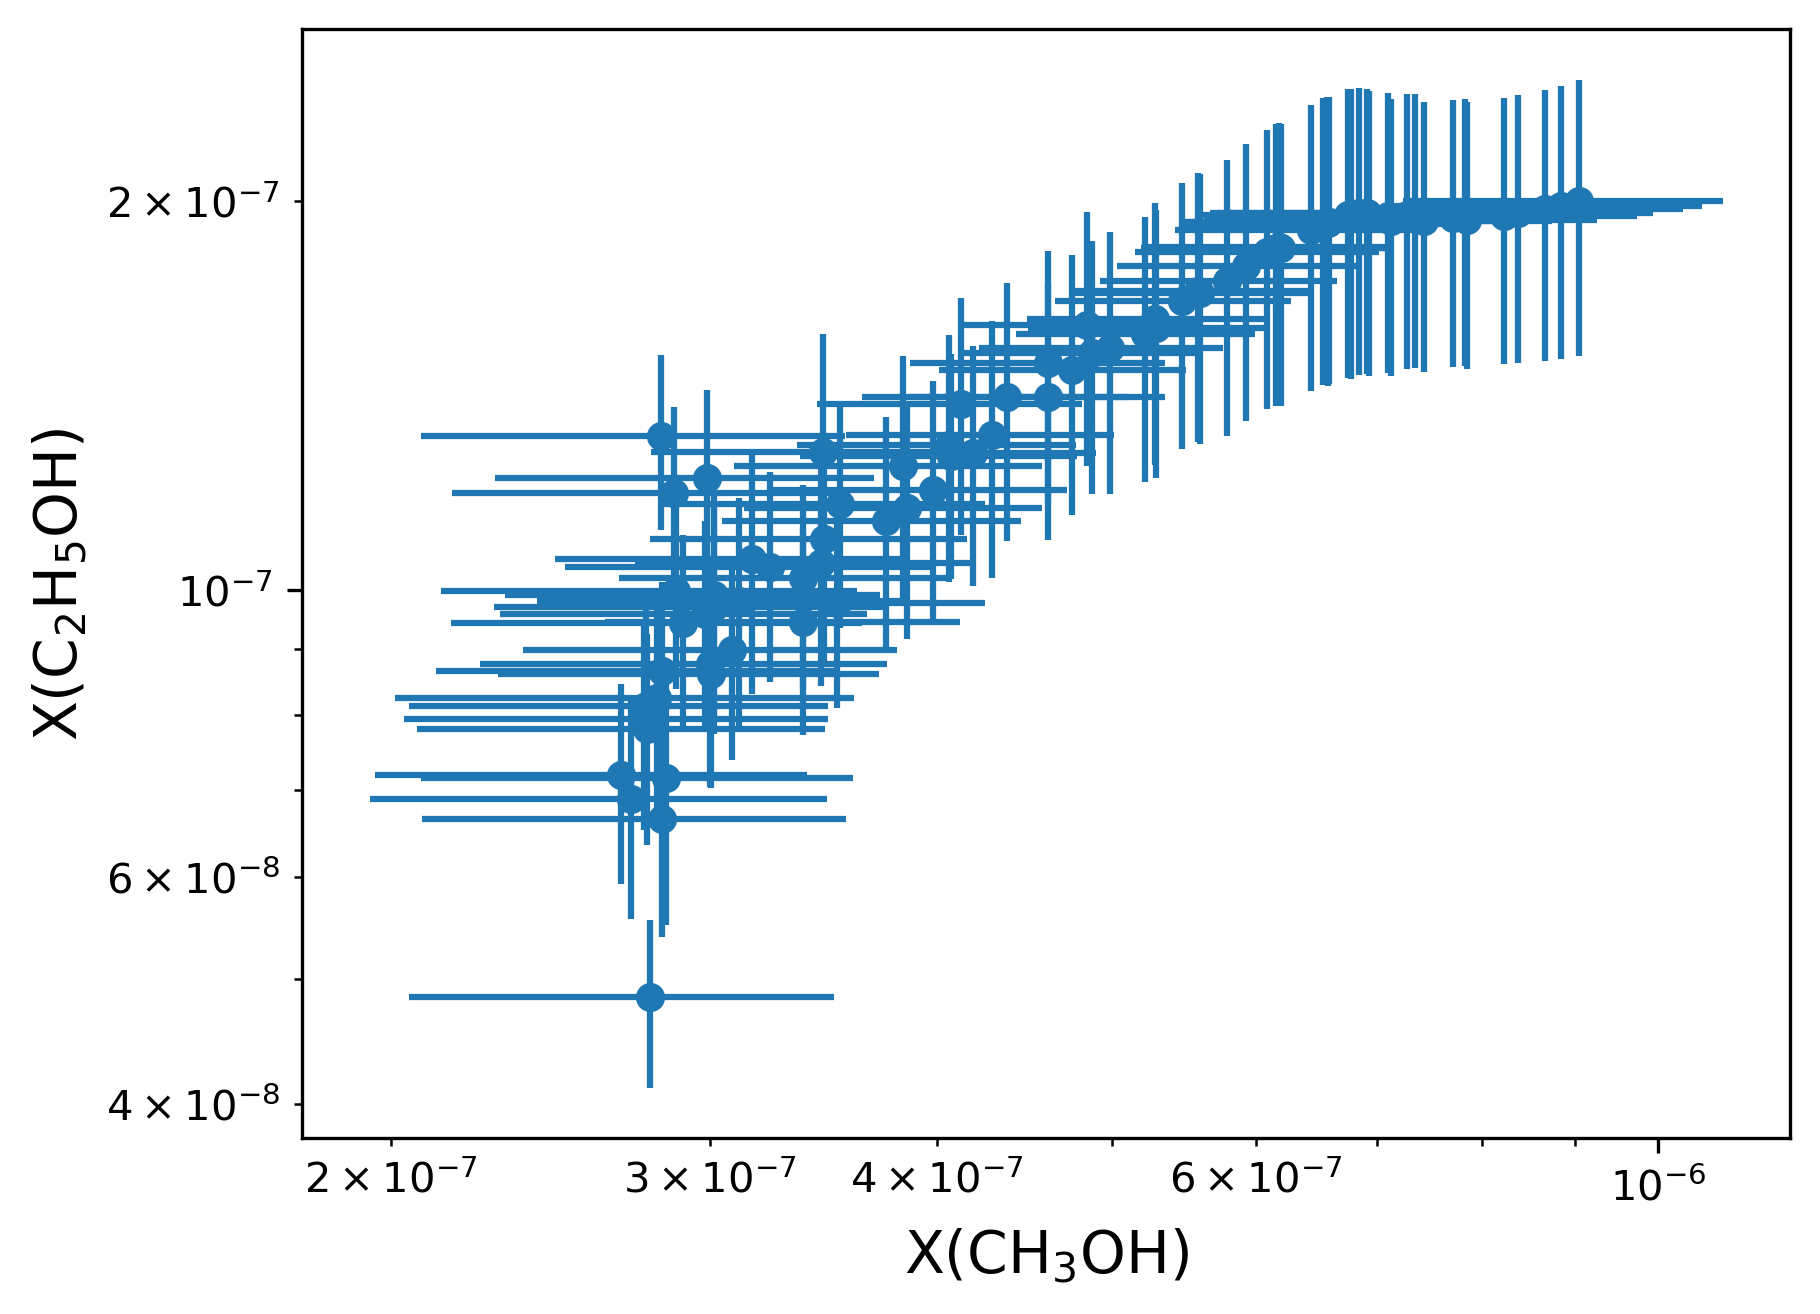

In [100]:
usable_distances=np.intersect1d(np.array(radial_average_xch3oh['Distance'].data), np.array(radial_average_xc2h5oh['Distance'].data),
                                               return_indices=True)
usable_xch3oh=radial_average_xch3oh[usable_distances[1]]

usable_xc2h5oh=radial_average_xc2h5oh[usable_distances[2]]

savetablepath=f'../tables/thesis_ethanolmethanol_results/{source}/xc2h5oh_vs_xch3oh.fits'
ethanolmethanoltable=hstack([usable_xch3oh,usable_xc2h5oh])
ethanolmethanoltable.write(savetablepath,overwrite=True)

plt.figure()
plt.errorbar(usable_xch3oh['X(CH3OH)'],usable_xc2h5oh['X(C2H5OH)'],fmt='o',
             xerr=usable_xch3oh['Error_X(CH3OH)'],yerr=usable_xc2h5oh['Error_X(C2H5OH)'],)
plt.xlabel(r'X(CH$_3$OH)',fontsize=14)
plt.ylabel('X(C$_2$H$_5$OH)',fontsize=14)
plt.xscale('log')
plt.yscale('log')
#plt.xlim(xmin=2.75e-7)

savefigpath=f'../plots/XC2H5OHvsXCH3OH/{source}/Xethanol_vs_Xmethanol.png'
if not os.path.exists(f'../plots/XC2H5OHvsXCH3OH/{source}/'):
    os.makedirs(f'../plots/XC2H5OHvsXCH3OH/{source}/')
plt.savefig(savefigpath)

plt.show()

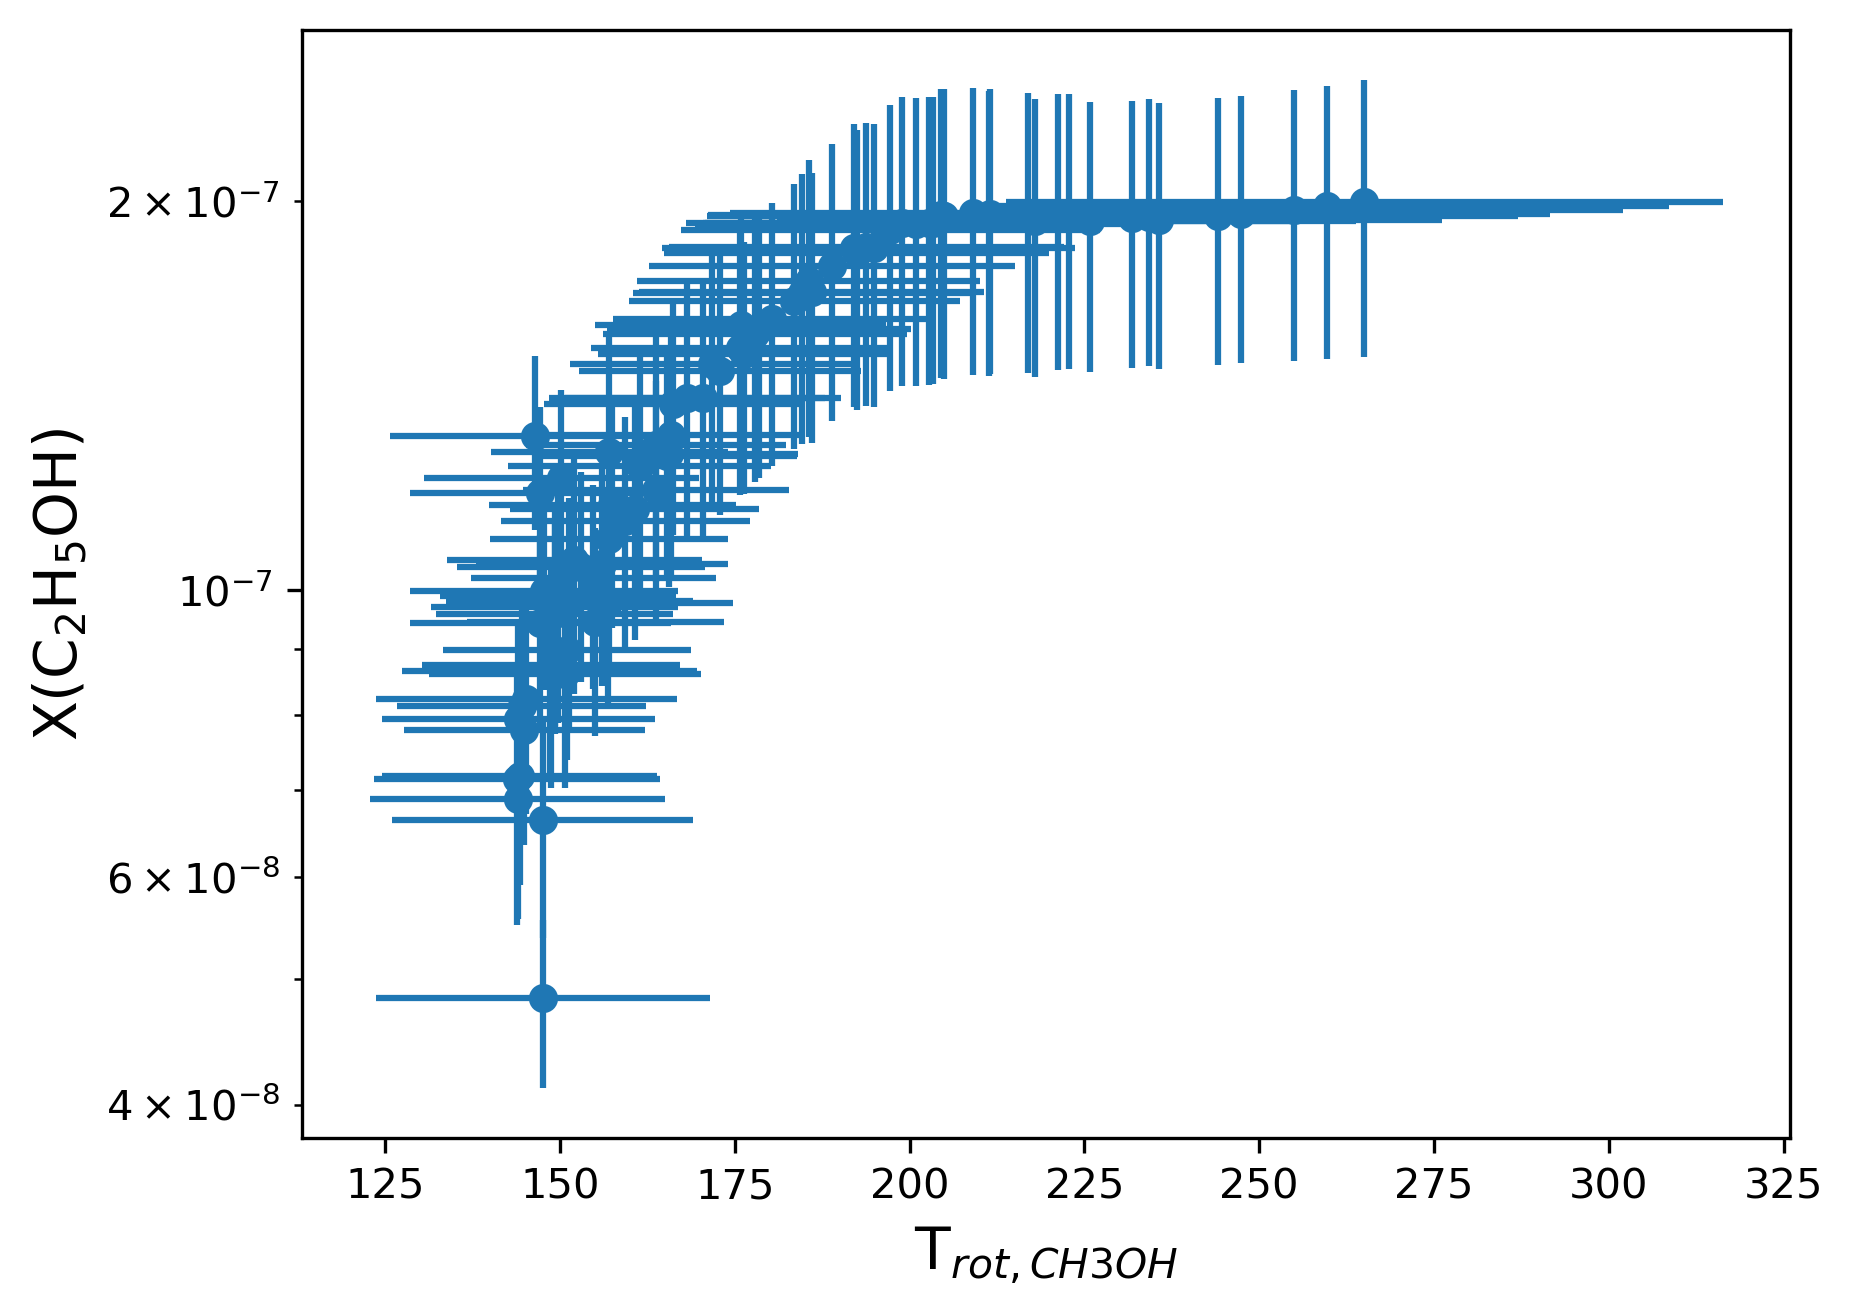

In [101]:
usable_distances=np.intersect1d(np.array(radial_average_ch3oh_trots['Distance'].data), np.array(radial_average_xc2h5oh['Distance'].data),
                                               return_indices=True)
usable_ch3oh_trots=radial_average_ch3oh_trots[usable_distances[1]]

usable_xc2h5oh=radial_average_xc2h5oh[usable_distances[2]]

savetablepath=f'../tables/thesis_ethanolmethanol_results/{source}/xc2h5oh_vs_trot-ch3oh.fits'
ethanol_trotmethanoltable=hstack([usable_ch3oh_trots,usable_xc2h5oh])
ethanol_trotmethanoltable.write(savetablepath,overwrite=True)

plt.figure()
plt.errorbar(usable_ch3oh_trots['Trot'],usable_xc2h5oh['X(C2H5OH)'],fmt='o',
             xerr=usable_ch3oh_trots['Error_Trot'],yerr=usable_xc2h5oh['Error_X(C2H5OH)'],)
plt.xlabel(r'T$_{rot,CH3OH}$',fontsize=14)
plt.ylabel('X(C$_2$H$_5$OH)',fontsize=14)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(xmin=2.75e-7)

savefigpath=f'../plots/XC2H5OHvsTrot_CH3OH/{source}/Xethanol_vs_TrotCH3OH.png'
if not os.path.exists(f'../plots/XC2H5OHvsTrot_CH3OH/{source}/'):
    os.makedirs(f'../plots/XC2H5OHvsTrot_CH3OH/{source}/')
plt.savefig(savefigpath)

plt.show()

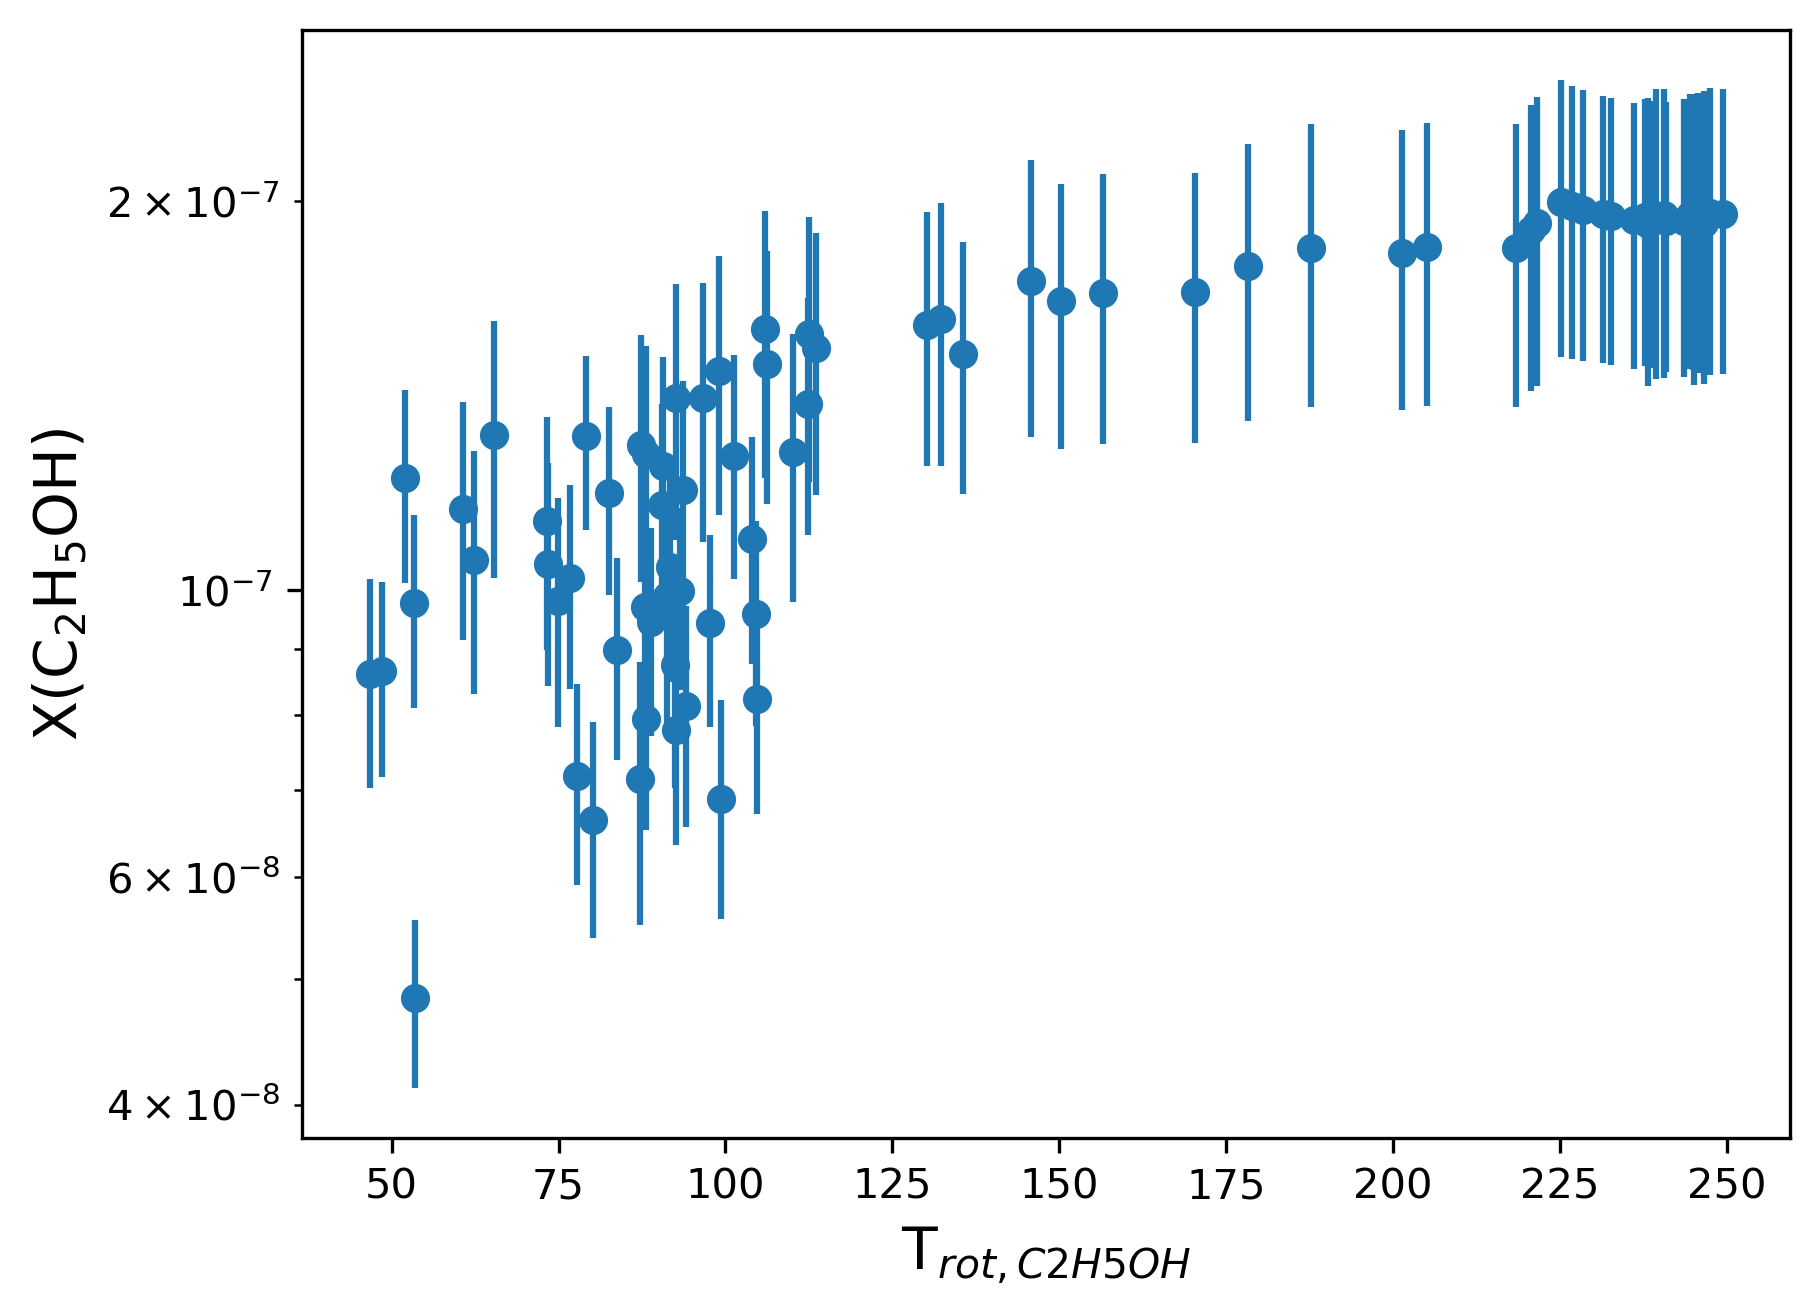

In [102]:
usable_distances=np.intersect1d(np.array(radial_average_trots['Distance'].data), np.array(radial_average_xc2h5oh['Distance'].data),
                                               return_indices=True)
usable_c2h5oh_trots=radial_average_trots[usable_distances[1]]

usable_xc2h5oh=radial_average_xc2h5oh[usable_distances[2]]

savetablepath=f'../tables/thesis_ethanolmethanol_results/{source}/xc2h5oh_vs_trot-c2h5oh.fits'
ethanol_trotethanoltable=hstack([usable_c2h5oh_trots,usable_xc2h5oh])
ethanol_trotethanoltable.write(savetablepath,overwrite=True)

plt.figure()
plt.errorbar(usable_c2h5oh_trots['Trot'],usable_xc2h5oh['X(C2H5OH)'],fmt='o',
             yerr=usable_xc2h5oh['Error_X(C2H5OH)'],)
plt.xlabel(r'T$_{rot,C2H5OH}$',fontsize=14)
plt.ylabel('X(C$_2$H$_5$OH)',fontsize=14)
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(xmin=2.75e-7)

savefigpath=f'../plots/XC2H5OHvsTrot_C2H5OH/{source}/Xethanol_vs_TrotC2H5OH.png'
if not os.path.exists(f'../plots/XC2H5OHvsTrot_C2H5OH/{source}/'):
    os.makedirs(f'../plots/XC2H5OHvsTrot_C2H5OH/{source}/')
plt.savefig(savefigpath)

plt.show()

In [32]:
radial_average_ch3oh_trots

Distance,Trot,Error_Trot
float64,float64,float64
0.0,215.319432786856,35.75162153599259
417.0000000000415,213.55667038493343,34.95206346399968
589.7270555096394,211.92750461255312,34.28889110124083
834.000000000083,209.0260927838986,33.10509784938387
932.4403466175052,207.84941257853296,32.72758381045103
1179.4541110192788,205.08217667623714,31.75247722004024
1251.0000000001246,204.8222494587979,31.296737149046603
1318.6697842903454,203.97223343143102,31.09576876334124
1503.514881868633,202.23522490812536,30.451182600143614


In [17]:
run bootstrap_makeradialtexdistr.py

Source: DSii
Figpath /blue/adamginsburg/d.jeff/repos/CH3OHTemps/figures/DSii//sep2023-2widerrefslab/ already exists.
Data directory /blue/adamginsburg/d.jeff/imaging_results/SgrB2DS-CH3OH/pacman_sep2023revolution/ already exists.
417.0000000000415 AU
Center p: 211.17109287808958 K
physical radius: 5500.0 AU
[5808.13791159 5671.81320214 5563.47391474 5484.77866463 5437.01480594
 5421.         5437.01480594 5484.77866463 5563.47391474 5671.81320214
 5808.13791159 5793.1491436  5594.64207971 5421.         5274.67913716
 5158.00513765 5073.02395027 5021.34493936 5004.         5021.34493936
 5073.02395027 5158.00513765 5274.67913716 5421.         5594.64207971
 5793.1491436  5671.81320214 5437.01480594 5224.99502392 5038.63017099
 4880.85986277 4754.53152266 4662.20173309 4605.91554417 4587.
 4605.91554417 4662.20173309 4754.53152266 4880.85986277 5038.63017099
 5224.99502392 5437.01480594 5671.81320214 5610.16122763 5340.20561402
 5090.13369176 4863.0138803  4662.20173309 4491.22744915 435

divide by zero encountered in divide


In [18]:
radialdistance == centrtopix

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,